Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

from datasets import load_dataset

from bs4 import BeautifulSoup

from nltk.tokenize import word_tokenize
import nltk

from pathlib import Path

os.chdir('DATA')
nltk.download('punkt_tab')

c:\Users\rowan_p6g6\StudioProjects\iResearch-2024\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rowan_p6g6\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [35]:
orbitron = Path(mpl.get_data_path(), 'C:/Users/rowan_p6g6/Downloads/Orbitron/static/Orbitron-bold.ttf')
space_grotesk = Path(mpl.get_data_path(), 'C:/Users/rowan_p6g6/Downloads/Space_Grotesk/static/SpaceGrotesk-bold.ttf')

## ATCO Sim dataset

In [4]:
df = load_dataset("Jzuluaga/atcosim_corpus")

c:\Users\rowan_p6g6\StudioProjects\iResearch-2024\venv\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\rowan_p6g6\.cache\huggingface\hub\datasets--Jzuluaga--atcosim_corpus. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


KeyboardInterrupt: 

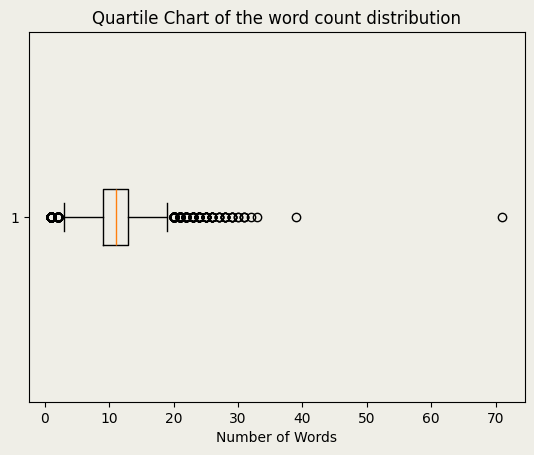

In [12]:
wordCounts = []

for i in df['train']['text']:
    wordCounts.append(len(word_tokenize(i)))

for i in df['test']['text']:
    wordCounts.append(len(word_tokenize(i)))

averageWordCount = sum(wordCounts) / len(wordCounts)
minWordCount = min(wordCounts)
maxWordCount = max(wordCounts)

plt.boxplot(wordCounts, vert=False, notch=False)
plt.title('Quartile Chart of the word count distribution')
plt.xlabel('Number of Words')
plt.rcParams['figure.facecolor'] = '040e28'
plt.rcParams['axes.facecolor'] = '040e28'
plt.show()

## ATCO2 dataset

In [2]:
infoFiles = [f for f in os.listdir() if f.endswith('.info')]
audioFiles = [f for f in os.listdir() if f.endswith('.wav')]
xmlFiles = [f for f in os.listdir() if f.endswith('.xml')]

Average word count 43.004561003420754
Min word count 11
Max word count 310


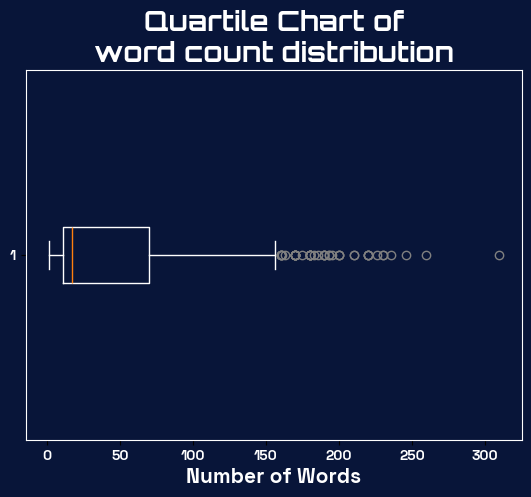

In [42]:
total = 0
numText = 0
wordCounts = []

min = -1
max = -1

for i in xmlFiles:
	with open (i, 'r', encoding='utf-8') as file:
		data = file.read()

	Bs_data = BeautifulSoup(data, "xml")
	b_unique = Bs_data.find_all('text')
	min = len(word_tokenize(b_unique[0].text))
	for j in b_unique:
		length = len(word_tokenize(j.text))
		total += length
		wordCounts.append(length)
		numText += 1

		if length < min:
			min = length
		elif length > max:
			max = length

print('Average word count', total/numText)
print('Min word count', min)
print('Max word count', max)

bp = plt.boxplot(wordCounts, vert=False, notch=False)
plt.title('Quartile Chart of\nword count distribution', color='w', fontdict={'font': orbitron, 'fontsize': 20})
plt.xticks(fontproperties=space_grotesk)
plt.yticks(fontproperties=space_grotesk)
plt.xlabel('Number of Words', color='w', fontdict={'font': space_grotesk, 'fontsize': 15})
plt.setp(plt.gca().get_xticklabels(), color='w')
plt.setp(plt.gca().get_yticklabels(), color='w')
for element in ['boxes', 'whiskers', 'fliers', 'means', 'caps']:
        plt.setp(bp[element], color='w')
plt.setp(bp['fliers'], marker='o', markeredgecolor='gray')
plt.rcParams['figure.facecolor'] = '081539'
plt.rcParams['axes.facecolor'] = '081539'
plt.gca().spines['top'].set_color('white')
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().spines['right'].set_color('white')
plt.show()

identifying airport distribution

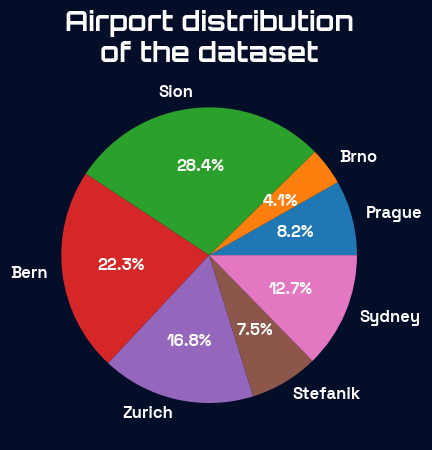

In [30]:
numFiles     = [0, 0, 0, 0, 0, 0, 0]
airportNames = ['Prague', 'Brno', 'Sion', 'Bern', 'Zurich', 'Stefanik', 'Sydney']
# Prague, Brno, Sion, Bern, Zurich, Stefanik (Bratislava, Slovakia), Sydney

for i in infoFiles:
	with open (i, 'r') as file:
		for line in file:
			if 'Praha Ruzyne' in line:
				numFiles[0] += 1
			elif 'Brno' in line:
				numFiles[1] += 1
			elif 'Sion' in line:
				numFiles[2] += 1
			elif 'Bern' in line:
				numFiles[3] += 1
			elif 'Zurich' in line:
				numFiles[4] += 1
			elif 'Bratislava' in line:
				numFiles[5] += 1
			elif 'Sydney' in line:
				numFiles[6] += 1

orbitron = Path(mpl.get_data_path(), 'C:/Users/rowan_p6g6/Downloads/Orbitron/static/Orbitron-bold.ttf')
space_grotesk = Path(mpl.get_data_path(), 'C:/Users/rowan_p6g6/Downloads/Space_Grotesk/static/SpaceGrotesk-bold.ttf')

plt.pie(numFiles, labels=airportNames, autopct='%1.1f%%', textprops={'color': 'w', 'fontweight': 'bold', 'font': space_grotesk, 'fontsize': 12})
plt.title('Airport distribution\nof the dataset', color='w', fontdict={'fontweight': 'bold', 'fontsize': 20, 'font': orbitron})
plt.gca().set_facecolor('#040e28')
plt.rcParams['figure.facecolor'] = '040e28'
plt.rcParams['axes.facecolor'] = '040e28'
plt.show()